<a href="https://colab.research.google.com/github/tengkumuazabs/my-portfolio/blob/main/python-projects/Predict_status_of_chronic_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 19PgRhV9PqXKS08wZKk-fZWD8lIrW2pCD

Downloading...
From: https://drive.google.com/uc?id=19PgRhV9PqXKS08wZKk-fZWD8lIrW2pCD
To: /content/kidney_disease.csv
100% 48.6k/48.6k [00:00<00:00, 63.4MB/s]


In [ ]:
df=pd.read_csv('kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
# renaming the columns

In [ ]:
!gdown 1j9s-ffXqfBWp-KGgPJ2a90T5Y4DVyu-t

Downloading...
From: https://drive.google.com/uc?id=1j9s-ffXqfBWp-KGgPJ2a90T5Y4DVyu-t
To: /content/data_description.txt
100% 502/502 [00:00<00:00, 1.80MB/s]


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
columns=pd.read_csv('data_description.txt',sep='-')

In [ ]:
columns.head()

,1. Features:
id,id
age,age
bp,blood pressure
sg,specific gravity
al,albumin


In [ ]:
columns=columns.reset_index()

In [ ]:
columns.columns=['cols','abb_col_names']

In [ ]:
columns.head()

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [ ]:
columns.abb_col_names=columns.abb_col_names.replace(" ", "_",regex=True)

In [ ]:
columns.head()

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood_pressure
3,sg,specific_gravity
4,al,albumin


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns=columns.abb_col_names.values

In [ ]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,_pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
_pus_cell                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
ypertension                 object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [ ]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', '_pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
features=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']

In [ ]:
def convert_type(df,features):
  df[features]=pd.to_numeric(df[features],errors='coerce')

In [ ]:
for feature in features:
  convert_type(df,feature)

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
# extract numerical and categorical features

In [ ]:
def extract_cat_num(df):
  cat_col=[col for col in df.columns if df[col].dtype=='object']
  num_col=[col for col in df.columns if df[col].dtype!='object']
  return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(df)

In [ ]:
cat_col

['red_blood_cells',
 '_pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'ypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [ ]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
for col in cat_col:
  print('{} has {} values \n'.format(col, df[col].unique()))

red_blood_cells has [nan 'normal' 'abnormal'] values 

_pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

ypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [ ]:
df.diabetes_mellitus.replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df.coronary_artery_disease.replace('\tno','no',inplace=True)
df['class'].replace('ckd\t','ckd',inplace=True)

In [ ]:
for col in cat_col:
  print('{} has {} values \n'.format(col, df[col].unique()))

red_blood_cells has [nan 'normal' 'abnormal'] values 

_pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

ypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has ['ckd' 'notckd'] values 



In [ ]:
len(num_col)

14

In [ ]:
# checking features distributons

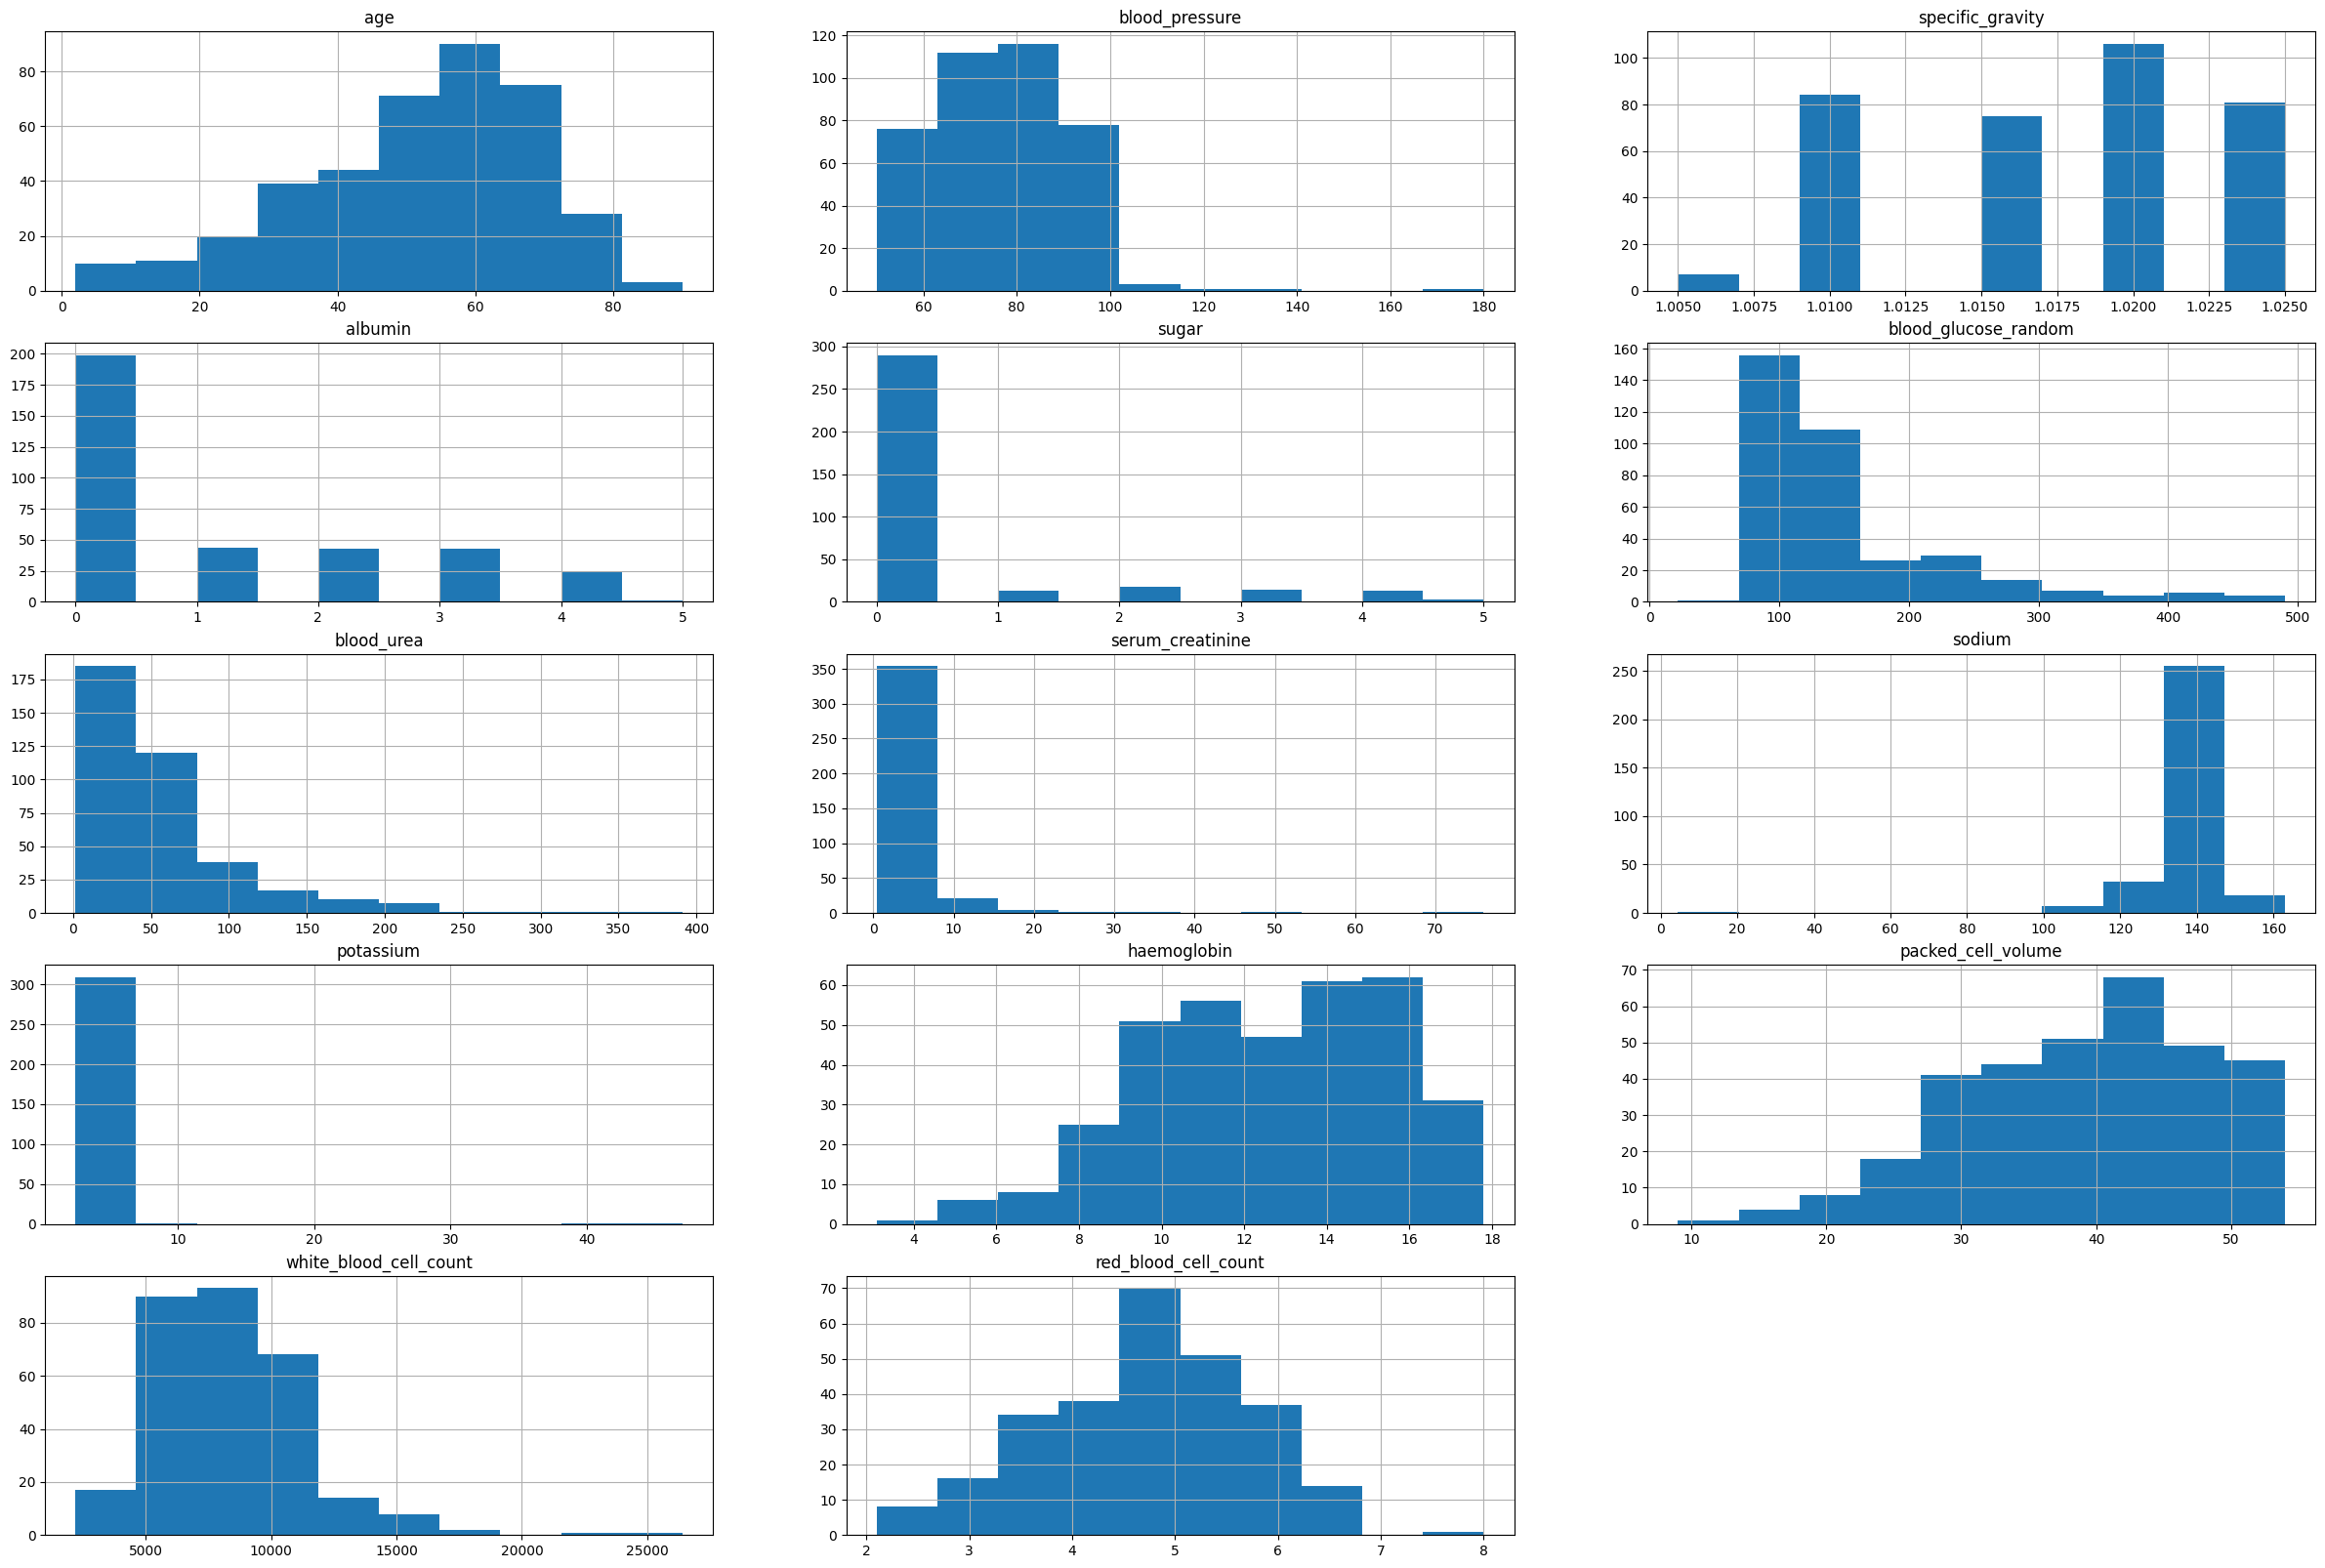

In [ ]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
  plt.subplot(5,3,i+1)
  df[feature].hist()
  plt.title(feature)

observation results:
- age looks like a bit left skewed
- blood glucose random is right skewed
- blood urea is also a bit right skewed
- rest of the features are lightly skewed

In [ ]:
# checking the label distribution for categorical data

In [ ]:
len(cat_col)

11

In [ ]:
df.anemia.isna().sum()

1

In [ ]:
df.dropna()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,_pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
df['anemia'].dropna()

0       no
1       no
2      yes
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: anemia, Length: 399, dtype: object

<Axes: xlabel='anemia', ylabel='count'>

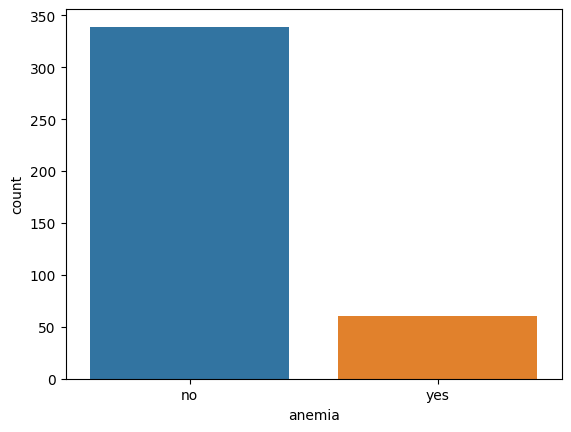

In [ ]:
sns.countplot(x='anemia', data=df.anemia.dropna().reset_index())

red_blood_cells
_pus_cell
pus_cell_clumps
bacteria
ypertension
diabetes_mellitus
coronary_artery_disease
appetite
pedal_edema
anemia
class


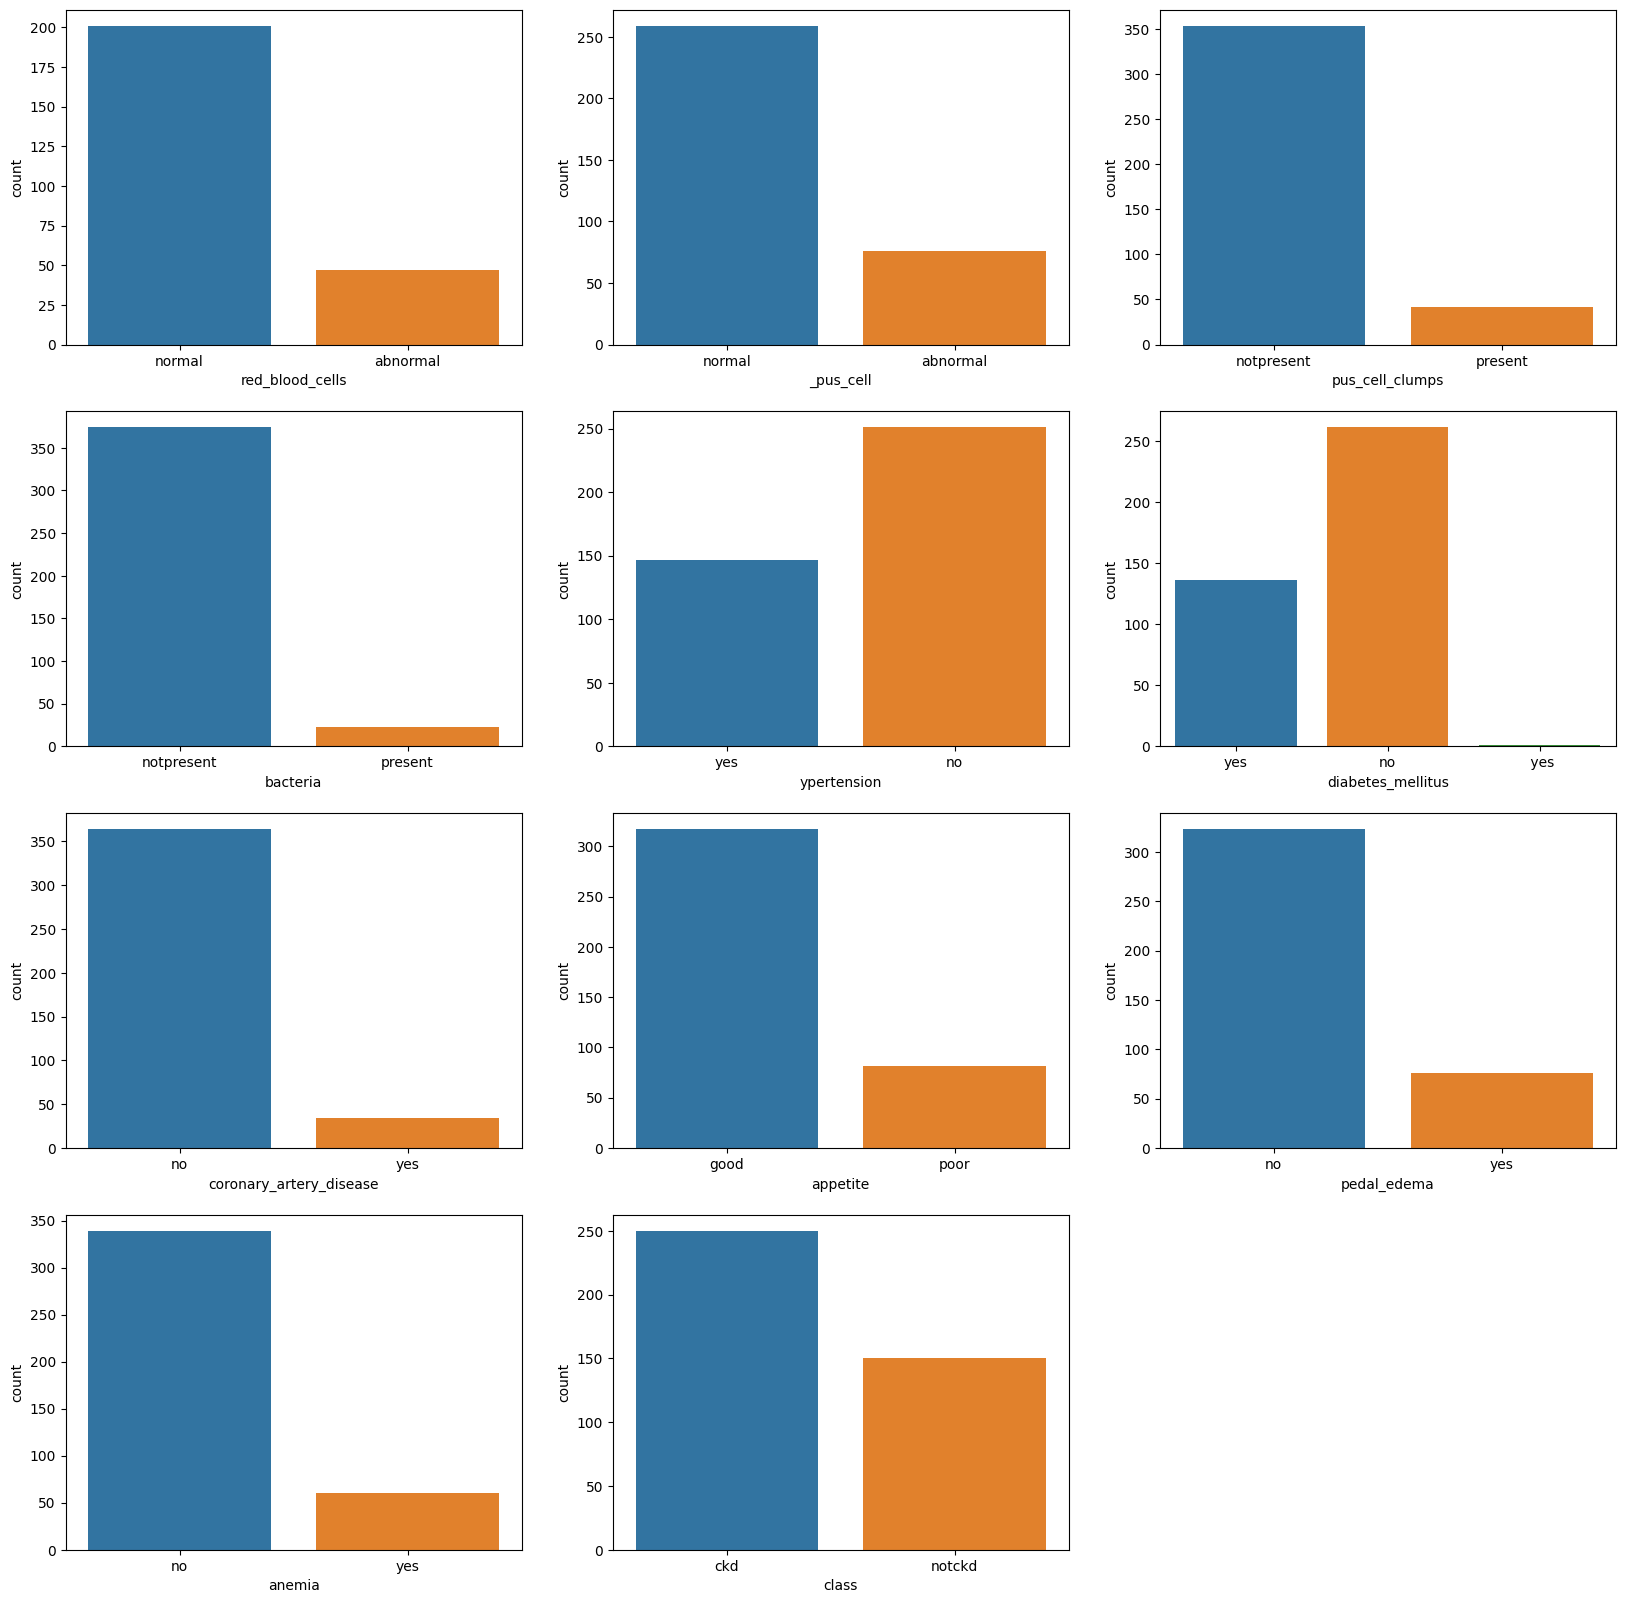

In [ ]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
  print(feature)
  plt.subplot(4,3,i+1)
  sns.countplot(x=feature, data=df[feature].dropna().reset_index())

a few features have imbalanced distribution of categories. stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target class')

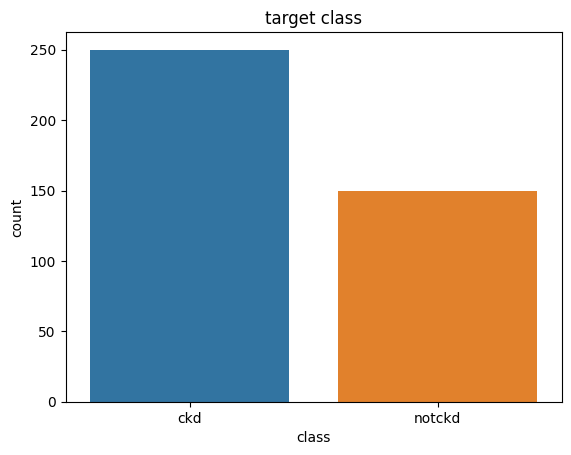

In [ ]:
sns.countplot(x='class',data=df)
plt.xlabel('class')
plt.ylabel('count')
plt.title('target class')

In [ ]:
# correlations

<ipython-input-48-b866e9731ca5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

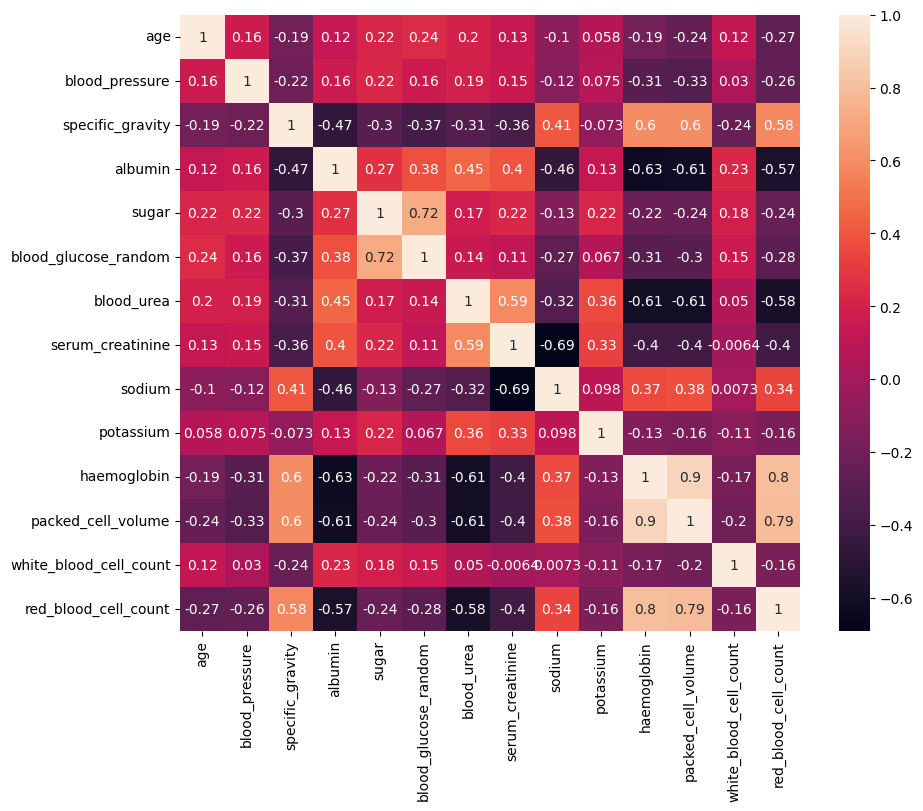

In [ ]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df.groupby(['red_blood_cells','class']).red_blood_cell_count.agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [ ]:
# check for positive correlation and its impact on classes

In [ ]:
import plotly.express as px

In [ ]:
px.violin(df,x='class',y='red_blood_cell_count',color='class')

In [ ]:
px.scatter(df,'haemoglobin','packed_cell_volume')

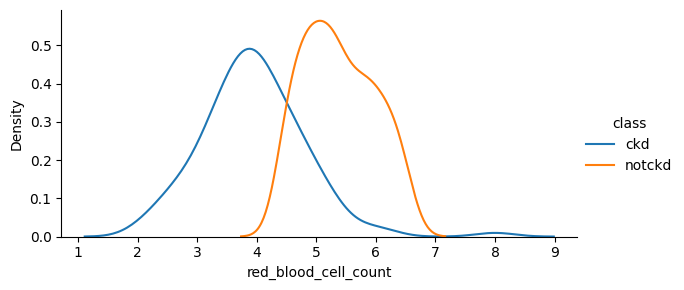

In [ ]:
grid=sns.FacetGrid(df,hue='class',aspect=2)
grid.map(sns.kdeplot,'red_blood_cell_count')
grid.add_legend()

both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD because its distribution is a little bit left-skewed but quite close to a normal distribution

In [ ]:
def violin(col):
  fig=px.violin(df,y=col,x='class',color='class',box=True)
  return fig.show()

def scatters(col1,col2):
  fig=px.scatter(df,x=col1,y=col2,color='class')
  return fig.show()

In [ ]:
def kde_plot(feature):
  grid=sns.FacetGrid(df,hue='class',aspect=2)
  grid.map(sns.kdeplot,feature)
  grid.add_legend()

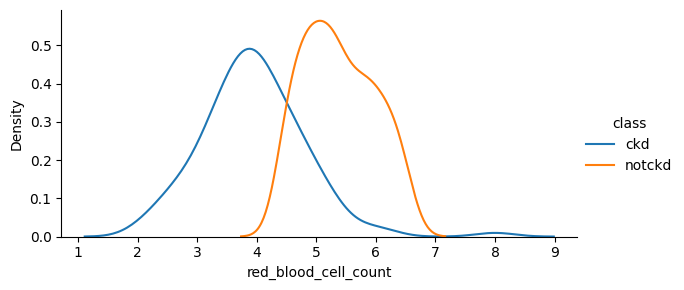

In [ ]:
kde_plot('red_blood_cell_count')

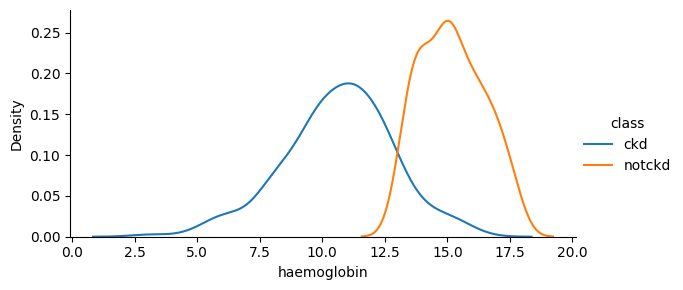

In [ ]:
kde_plot('haemoglobin')

In [ ]:
scatters('red_blood_cell_count', 'packed_cell_volume')

In [ ]:
scatters('red_blood_cell_count','haemoglobin')

rbccount range approx 2 to < 4.5 and haemoglobin between 3 and < 13 are mostly classified as ckd

rbccount range > 4.5 to approx 6.1 and haemoglobin between > 13 to 17.8 are classified as notckd

In [ ]:
violin('red_blood_cell_count')

In [ ]:
violin('packed_cell_volume')

In [ ]:
# check for negative correlation and its impact on classes

albumin, blood urea -> red blood cell count, packed cell volume, haemoglobin

In [ ]:
scatters('red_blood_cell_count','albumin')

albumin levels above 0 affect ckd obviously

In [ ]:
scatters('packed_cell_volume','blood_urea')

packed cell volume >= 49 largely affects to be non ckd

In [ ]:
fig=px.bar(df,x='specific_gravity',y='packed_cell_volume',
           color='class',barmode='group',height=400)
fig.show()

specific gravity >= 1.02 affects notckd

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,_pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
_pus_cell                   65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
ypertension                  2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [ ]:
cat_col

['red_blood_cells',
 '_pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'ypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

<Axes: xlabel='red_blood_cells', ylabel='count'>

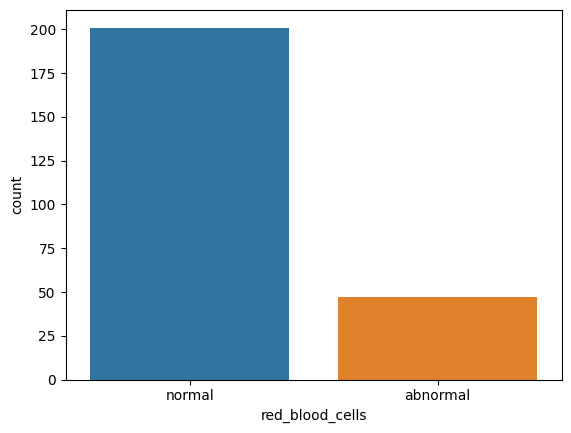

In [ ]:
sns.countplot(x=df.red_blood_cells, data=df.dropna().reset_index())

In [ ]:
data=df.copy()

In [ ]:
# random value imputation

In [ ]:
data.red_blood_cells.isnull().sum()

152

In [ ]:
data.red_blood_cells.dropna().sample()

146    abnormal
Name: red_blood_cells, dtype: object

In [ ]:
random_sample=data.red_blood_cells.dropna().sample(data.red_blood_cells.isnull().sum())

In [ ]:
random_sample

282      normal
195    abnormal
272      normal
396      normal
323      normal
         ...   
215      normal
311      normal
212      normal
354      normal
54       normal
Name: red_blood_cells, Length: 152, dtype: object

In [ ]:
random_sample.index

Int64Index([282, 195, 272, 396, 323, 352, 391,  22, 357, 340,
            ...
            304, 342, 161,  56, 324, 215, 311, 212, 354,  54],
           dtype='int64', length=152)

In [ ]:
data[data.red_blood_cells.isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
random_sample.index=data[data.red_blood_cells.isnull()].index

In [ ]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [ ]:
random_sample

0        normal
1      abnormal
5        normal
6        normal
10       normal
         ...   
309      normal
322      normal
349      normal
350      normal
381      normal
Name: red_blood_cells, Length: 152, dtype: object

In [ ]:
data.loc[data.red_blood_cells.isnull(),'red_blood_cells']

Series([], Name: red_blood_cells, dtype: object)

In [ ]:
data.loc[data.red_blood_cells.isnull(),'red_blood_cells']=random_sample

In [ ]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,_pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


<Axes: xlabel='red_blood_cells', ylabel='count'>

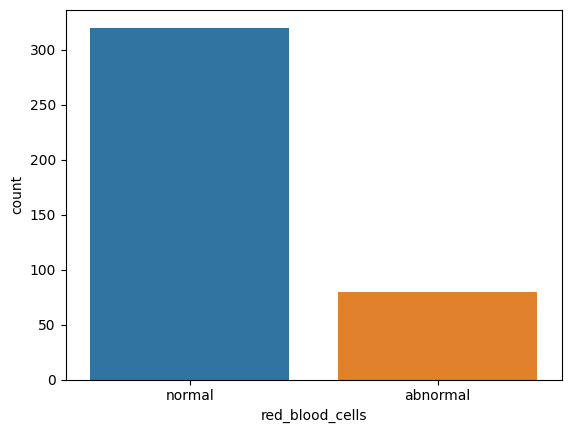

In [ ]:
sns.countplot(x=data.red_blood_cells,data=data.dropna().reset_index())

In [ ]:
data.red_blood_cells.value_counts()/len(data)

normal      0.8
abnormal    0.2
Name: red_blood_cells, dtype: float64

In [ ]:
def random_value_imputation(feature):
  random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
  random_sample.index=data[data[feature].isnull()].index
  data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', '_pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
random_value_imputation('_pus_cell')
random_value_imputation('red_blood_cells')

In [ ]:
data[cat_col].isnull().sum()

red_blood_cells            0
_pus_cell                  0
pus_cell_clumps            4
bacteria                   4
ypertension                2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
pedal_edema                1
anemia                     1
class                      0
dtype: int64

In [ ]:
mode=data['pus_cell_clumps'].mode()[0]
mode

'notpresent'

In [ ]:
data['pus_cell_clumps']=data['pus_cell_clumps'].fillna(mode)

In [ ]:
def impute_mode(feature):
  mode=data[feature].mode()[0]
  data[feature]=data[feature].fillna(mode)

In [ ]:
for col in cat_col:
  impute_mode(col)

In [ ]:
data[cat_col].isnull().sum()

red_blood_cells            0
_pus_cell                  0
pus_cell_clumps            0
bacteria                   0
ypertension                0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
data[num_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
for col in num_col:
  random_value_imputation(col)

In [ ]:
data[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# feature encoding

In [ ]:
for col in cat_col:
  print('{} has {} categories'.format(col,data[col].nunique()))

red_blood_cells has 2 categories
_pus_cell has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes_mellitus has 3 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
pedal_edema has 2 categories
anemia has 2 categories
class has 2 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
  data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,_pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,308.0,...,38.0,6000.0,3.4,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.7,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [ ]:
# feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ind_col=[col for col in data.columns if col != 'class']
dep_col='class'

In [ ]:
x=data[ind_col]
y=data[dep_col]

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)

In [ ]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7aa790048550>)

In [ ]:
ordered_feature.scores_

array([1.15460947e+02, 7.72053211e+01, 5.56807143e-03, 2.31095761e+02,
       9.55792593e+01, 1.12133333e+01, 1.55463203e+01, 2.52000000e+01,
       1.32000000e+01, 2.34707201e+03, 2.40894376e+03, 3.62699538e+02,
       2.80573576e+01, 3.39722231e+00, 1.16981203e+02, 3.38732166e+02,
       1.80728477e+04, 2.39533276e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [ ]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=['score'])
datascores

,score
0,115.460947
1,77.205321
2,0.005568
3,231.095761
4,95.579259
5,11.213333
6,15.546320
7,25.200000
8,13.200000
9,2347.072008


In [ ]:
x.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', '_pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'ypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

In [ ]:
dfcolumns=pd.DataFrame(x.columns)
dfcolumns

,0
0,age
1,blood_pressure
2,specific_gravity
3,albumin
4,sugar
5,red_blood_cells
6,_pus_cell
7,pus_cell_clumps
8,bacteria
9,blood_glucose_random


In [ ]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [ ]:
features_rank

,0,score
0,age,115.460947
1,blood_pressure,77.205321
2,specific_gravity,0.005568
3,albumin,231.095761
4,sugar,95.579259
5,red_blood_cells,11.213333
6,_pus_cell,15.546320
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2347.072008


In [ ]:
features_rank.columns=['features','score']
features_rank

,features,score
0,age,115.460947
1,blood_pressure,77.205321
2,specific_gravity,0.005568
3,albumin,231.095761
4,sugar,95.579259
5,red_blood_cells,11.213333
6,_pus_cell,15.546320
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2347.072008


In [ ]:
features_rank.nlargest(10,'score')

,features,score
16,white_blood_cell_count,18072.847694
10,blood_urea,2408.943757
9,blood_glucose_random,2347.072008
11,serum_creatinine,362.699538
15,packed_cell_volume,338.732166
3,albumin,231.095761
14,haemoglobin,116.981203
0,age,115.460947
4,sugar,95.579259
18,ypertension,88.200000


In [ ]:
selected_columns=features_rank.nlargest(10,'score').features.values

In [ ]:
selected_columns

array(['white_blood_cell_count', 'blood_urea', 'blood_glucose_random',
       'serum_creatinine', 'packed_cell_volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [ ]:
x_new=data[selected_columns]

In [ ]:
# model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,train_size=0.75)

In [ ]:
x_train.shape

(300, 10)

In [ ]:
x_test.shape

(100, 10)

In [ ]:
y_train.value_counts()

0    185
1    115
Name: class, dtype: int64

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
param={
    'learning_rate':[0.05,0.2,0.25],
    'max_depth':[5,8,10,12],
    'min_child_weight':[1,3,5,7],
    'gamma':[0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf=XGBClassifier()

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
random_search=RandomizedSearchCV(clf, param_distributions=param,n_iter=5,
                                 scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0,
 'colsample_bytree': 0.3}

In [ ]:
clf=random_search.best_estimator_

In [ ]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print('cm:')
print(cm)

cm:
[[64  1]
 [ 2 33]]


In [ ]:
accuracy_score(y_test,y_pred)

0.97